<a href="https://colab.research.google.com/github/ebriantar/BrianAntar/blob/main/BsAs_Traffic_Flow_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series:

## Dataset: Vehicle Flow by Units of a highway in Buenos Aires, Argentina (AUSA)

**Download the dataset from [here](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). We are going to use the following years 2017, 2018 y 2019.**



**Important:** At this oportunity we are going to analize the behaviour of the cash payment methods for the Illia highway


### Prediction of the traffic in the future:

In a first step we are going to predict the traffic of the Illia highway for the last quarter of 2019. After, we will try to predict the traffic flow for the entire 2020 year.


### Dataset Preparation:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flujo-vehicular-2017.csv', sep =',')

In [6]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [7]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [8]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [11]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Let's investigate and standarize the values that the following fields take **estacion, sentido, tipo_vehiculo y forma_pago:**

In [12]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [13]:
data_2020.replace({"ILLIA": "Illia"}, inplace=True)

In [14]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [15]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [16]:
data_2020.replace({'Auto':'Liviano', 'Auto con trailer':'Pesado', 'Moto':'Liviano', 'Pago Doble Auto':'Liviano',  'Pago Doble Auto con trailer / Pesado 2 Ejes':'Pesado', 
                   'Pago doble Moto':'Liviano', 'Pesados 2 Ejes':'Pesado', 'Pesados 3 Ejes':'Pesado', 'Pesados 4 Ejes':'Pesado', 'Pesados 5 Ejes':'Pesado',
                   'Pesados 6 Ejes':'Pesado', 'N/D':'Liviano'}, inplace=True)

In [17]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


In [18]:
data_2020.replace({"Efectivo": "EFECTIVO"}, inplace=True)

In [19]:
data_2020 = data_2020.drop(['mes', 'dia_fecha', 'observacion'], axis=1)
data_2020 = data_2020.reindex(columns=['periodo','fecha','hora_inicio','hora_fin','dia','estacion','sentido','tipo_vehiculo','forma_pago',
                                        'cantidad_pasos'])

In [20]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   hora_inicio     float64
 3   hora_fin        float64
 4   dia             object 
 5   estacion        object 
 6   sentido         object 
 7   tipo_vehiculo   object 
 8   forma_pago      object 
 9   cantidad_pasos  float64
dtypes: float64(4), object(6)
memory usage: 193.3+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,0.0,1.0,Miércoles,ALBERDI,Centro,Liviano,EFECTIVO,24.0
1,2020.0,2020-01-01 00:00:00,0.0,1.0,Miércoles,ALBERDI,Provincia,Liviano,EFECTIVO,80.0
2,2020.0,2020-01-01 00:00:00,0.0,1.0,Miércoles,ALBERDI,Provincia,Liviano,Rec.Deuda,1.0
3,2020.0,2020-01-01 00:00:00,0.0,1.0,Miércoles,ALBERDI,Centro,Liviano,Rec.Deuda,1.0
4,2020.0,2020-01-01 00:00:00,0.0,1.0,Miércoles,ALBERDI,Provincia,Liviano,Rec.Deuda,1.0


#### **Datasets columns and information:**

**periodo**: year of the dataser

**fecha**: year day month

**hora_inicio** time that start the counting of vehicles (DROP)

**hora_fin** time that ends the counting of vehicles (this one it´ll be the time of reference)

**dia**: day of the week 

**estacion**: highway station

**sentido**: Centro o Provincia (way of the traffic)

**tipo_vehiculo**: Llight or heavy

**forma_pago**: payment method

**cantidad_pasos**: Quantity

We are going to use the **Illia** station and **Efectivo** payment method


In [21]:
dataset = pd.concat([data_2019, data_2018, data_2017])

mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [22]:
#We pass the date column to datetime format, and we join the end_time as time
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#We remove the date and time_fin columns since we include them in the date2 field
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [23]:
#fecha2 to fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [24]:
#We reorder the dataset by date
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


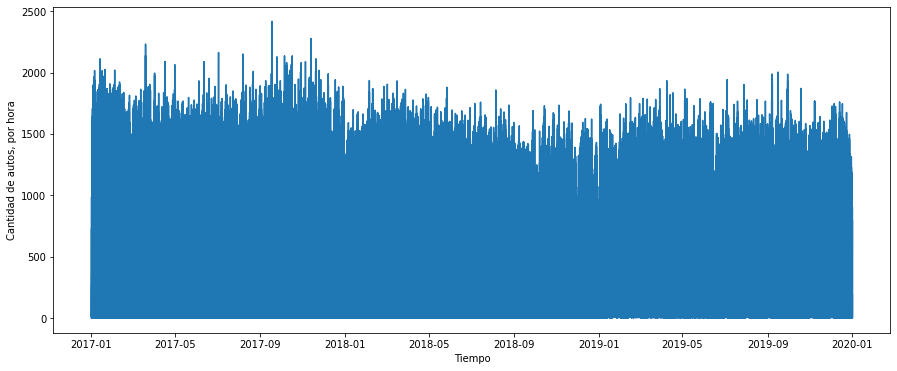

In [25]:
#We graph our data, as is
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Time')
plt.ylabel('Quantity of cars per day')
plt.show()

In [26]:
dataset_completo = pd.concat([data_2020, data_2019, data_2018, data_2017])

mask = np.logical_and(dataset_completo.estacion=='Illia', dataset_completo.forma_pago == 'EFECTIVO')
dataset_completo = dataset_completo[mask]


dataset_completo.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_completo['fecha2'] = pd.to_datetime(dataset_completo.fecha) + pd.to_timedelta(dataset_completo.hora_fin, unit = 'h')

dataset_completo.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_completo.rename(columns = {'fecha2':'fecha'}, inplace = True) 

dataset_completo.sort_values('fecha', inplace = True)
dataset_completo.reset_index(drop=True, inplace = True)

dataset_completo.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,1.0,2017-01-01
1,Domingo,Centro,Pesado,21.0,2017-01-01
2,Domingo,Centro,Pesado,10.0,2017-01-01
3,Domingo,Centro,Pesado,1.0,2017-01-01
4,Domingo,Centro,Liviano,857.0,2017-01-01


###**Data Exploration:**

In [27]:
#We resample our data to group by day, and thus perhaps achieve a better visualization
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


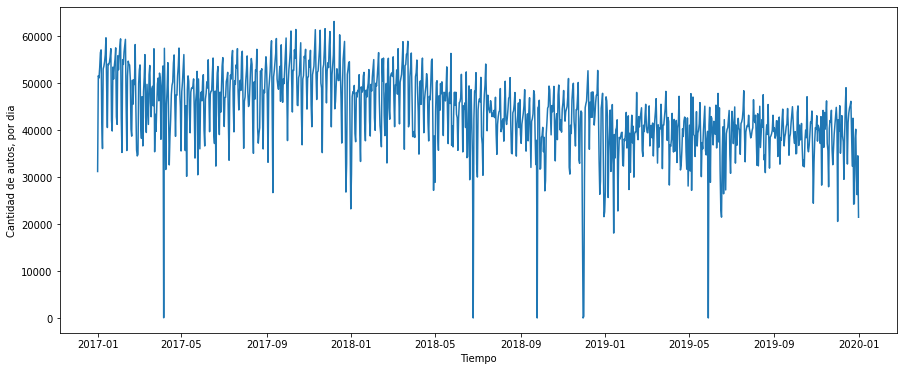

In [28]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Time')
plt.ylabel('Quantity of cars per day')
plt.show()

As we can see from the previous graph, there are some days in which anti-typical values are registered, particularly it is noted that they are days in which the number of steps appear as null. So the first thing to do is delete those records and fill them in with some missing value imputation method:

In [31]:
diario.cantidad_pasos[diario.cantidad_pasos<20000] = np.nan

In [29]:
diario.isna().sum()

cantidad_pasos    0
dtype: int64

In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
diario_nuevo = imputer.fit_transform(diario)
diario_nuevo = pd.DataFrame(diario_nuevo)
diario_nuevo.astype(int)

,0
0,31183
1,51568
2,51093
3,53332
4,56486
...,...
1090,40182
1091,30681
1092,26259
1093,34523


In [33]:
diario_nuevo.isna().sum()

0    0
dtype: int64

In [34]:
diario_nuevo.columns = ['cantidad_pasos']
diario = diario.drop(['cantidad_pasos'], axis=1)
diario.reset_index(drop = False, inplace=True)
diario = pd.concat([diario, diario_nuevo.cantidad_pasos], axis=1)
diario.head()

,fecha,cantidad_pasos
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0


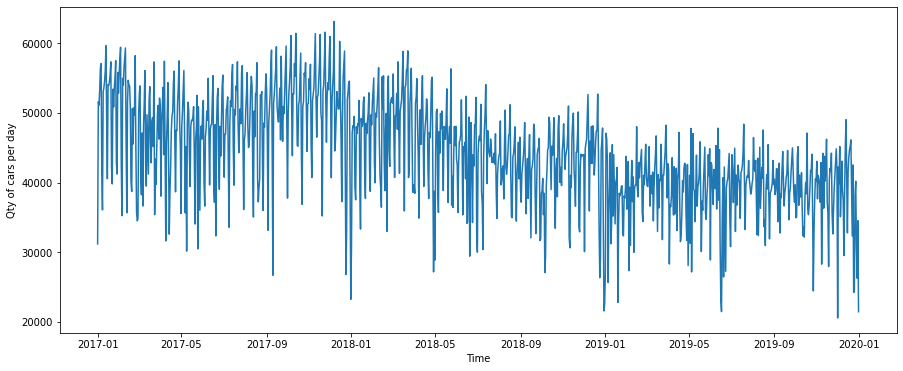

In [35]:
plt.figure(figsize = (15,6))
plt.plot(diario.fecha, diario.cantidad_pasos)
plt.xlabel('Time')
plt.ylabel('Qty of cars per day')
plt.show()

At first glance we can observe a downward trend in the number of cars, which begins with the beginning of each year. Next, autocorrelation and partial autocorrelation graphs will be made, to understand a little more the behavior of the data:

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


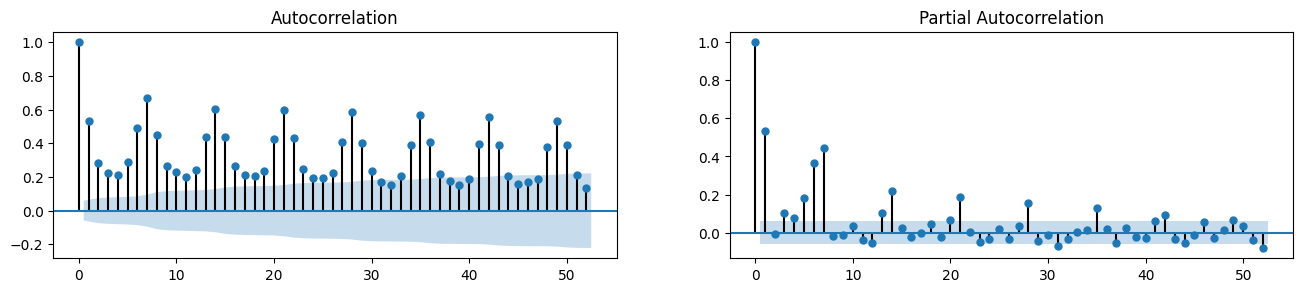

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(diario[['cantidad_pasos']], lags=52, ax=axes[0])
plot_pacf(diario[['cantidad_pasos']], lags=52, ax=axes[1])
plt.show()


In the autocorrelation graph we can see:
1.   There is a strong autocorrelation in the data, many of the points exceed the confidence interval or are on the edge (CI = 95%)
2.  A pattern is observed that repeats every 7 days

In the partial autocorrelation graph, we can see that there is no marked trend and the level of autocorrelation is not so determining (not in all cases it exceeds the confidence interval), that is, the direct autocorrelation to predict the behavior of an event taking into account the direct previous event is not decisive for all cases.

**Weekly analysis:  
Then a weekly resampling will be done in order to study the behavior of the series in this time window.**

In [37]:
#We resample our data to group by week and analyze from there what weekly trends there may be:
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


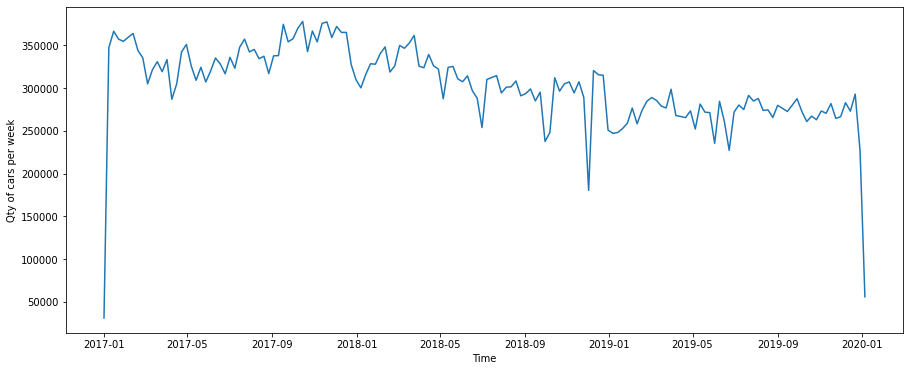

In [38]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Time')
plt.ylabel('Qty of cars per week')
plt.show()

As we can see in the previous graph, the values for the initial and final dates of the series present an anomaly. Given the low number of observations, it seems to be associated with a failure to load or collect data and that is why such data will be eliminated and its value is estimated to be equal to the sample directly adjacent to it.

In [40]:
semanal.cantidad_pasos[0] = semanal.cantidad_pasos[1]
semanal.cantidad_pasos[157] = semanal.cantidad_pasos[156]

In [39]:
semanal.isna().sum()

cantidad_pasos    0
dtype: int64

In [41]:
semanal.head()

,cantidad_pasos
fecha,
2017-01-01,347212
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


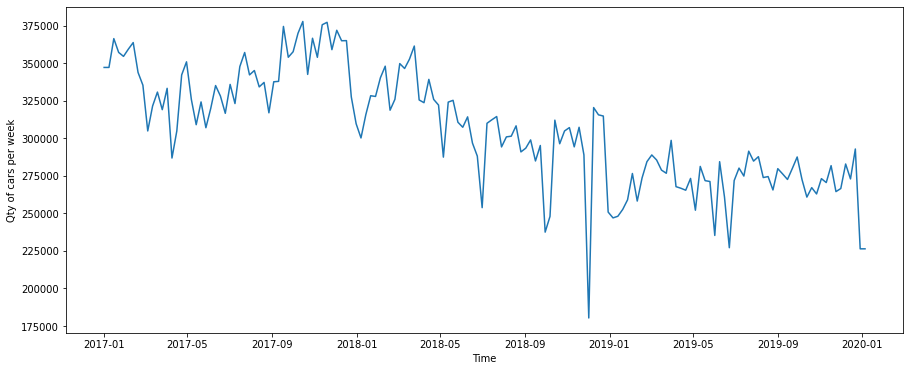

In [42]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Time')
plt.ylabel('Qty of cars per week')
plt.show()

We can observe again that there is a downward trend between annual periods, that is, the number of vehicles decreases from year to year and this trend is maintained, this may be due to a migration in the payment method to telepase (automatic debit), there were many policies of insentivation about it. At the same time we can see that at the end of each year / beginning of the next, there is always a marked decrease in the flow of cars, this may occur because they are the periods of less vehicular traffic in the city of Buenos Aires due to generalized vacations.

Now, the autocorrelation and partial autocorrelation graphs will be made, in order to better understand the behavior and dependence of the data:

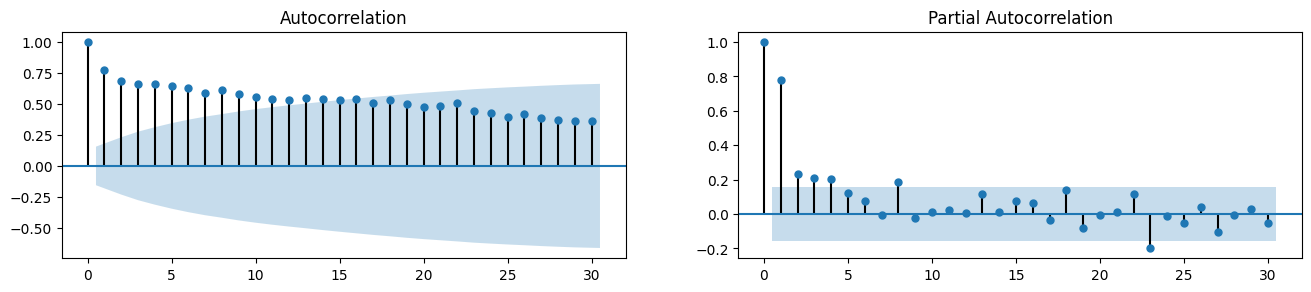

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(semanal[['cantidad_pasos']], lags=30, ax=axes[0])
plot_pacf(semanal[['cantidad_pasos']], lags=30, ax=axes[1])
plt.show()


What we can see from the autocorrelation and partial autocorrelation graphs is:

1. There is a correlation in the data, the fact that the bars exceed the 95% confidence interval implies that in these values there is a correlation present and not a statistical coincidence. But we can also notice that this effect decreases in the most distant samples, that is, as the sample moves away from the initial samples, it is lost.
2.   In the partial autocorrelation graph we can see that there is no direct correlation effect taking into account the data provided by the previous sample.



Next, in order to achieve greater visual clarity, the weekly curves per year will be plotted:

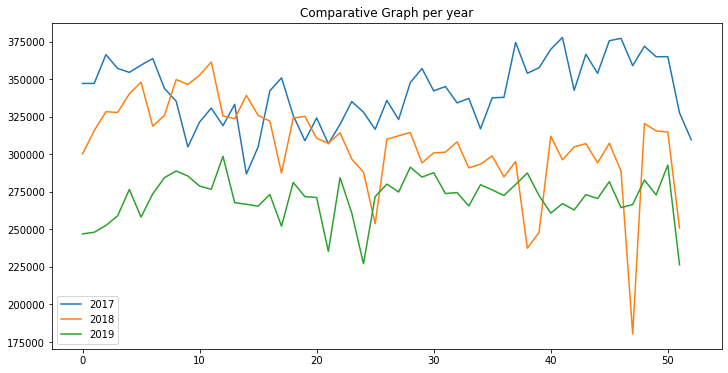

In [43]:
plt.figure(figsize = (12,6))
plt.plot(semanal['2017'].values, label='2017')
plt.plot(semanal['2018'].values, label='2018')
plt.plot(semanal['2019'].values, label='2019')
plt.title("Comparative Graph per year")
plt.legend()


As we have been mentioning, a negative trend is clearly noted in the number of cars that cross this highway annually, although the curves intertwine at times, the average decline is notorious. It will be necessary to study whether it is actually due to a migration in the payment method or there is another factor influencing it.

Next, a decomposition of the series will be graphed, it is sought to be able to observe the seasonality, trend and residual thereof, with the aim of being able to find trends and interpret behaviors of the series.

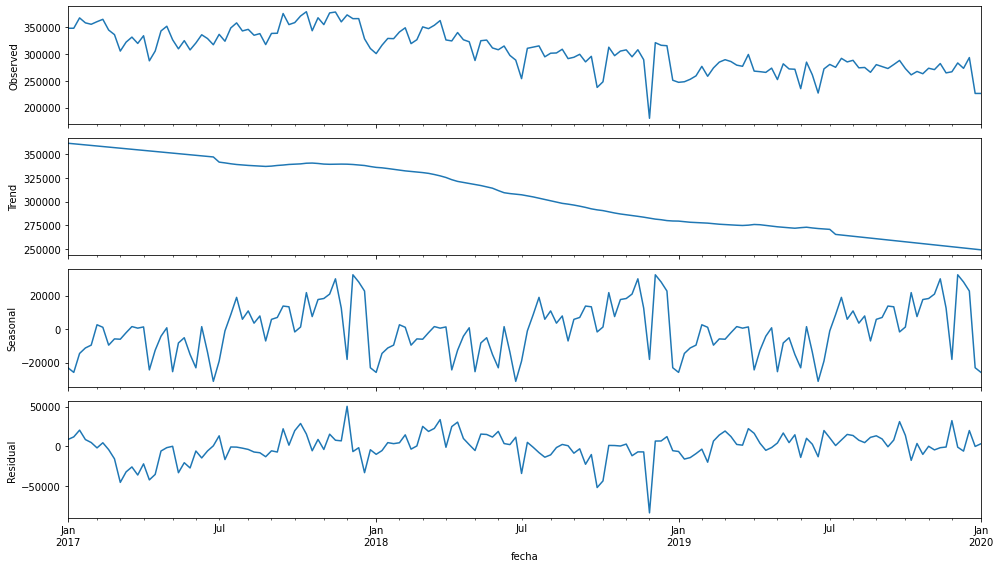

In [50]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

decomposition = sm.tsa.seasonal_decompose(semanal, model='additive', extrapolate_trend='freq')
fig = decomposition.plot()
plt.show()

How can we observe from the graph:


1. There is a decreasing trend that is accelerating year by year (it is seen that the slope is increasing)
2. In seasonality we can observe a pattern that is repeated annually
1. As in the graph where we observe the complete series on a weekly basis, we can see that there is an atypical value in December 2018, this may be due to the fact that works were being carried out to connect said highway with the new infrastructure work "Paseo del Bajo" which was inaugurated at the beginning of the 2019 and may have generated a prolonged work cutoff on said highway, being reflected in the graph as an abrupt drop in traffic flow.

Next, we will seek to analyze the cause of the decreasing trend. In the first place, it will seek to explain this trend with the hypothesis of migration to other means of payment (Telepase). To do this, we will generate a new dataset that includes said means of payment and we will seek to analyze its weekly trend.


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


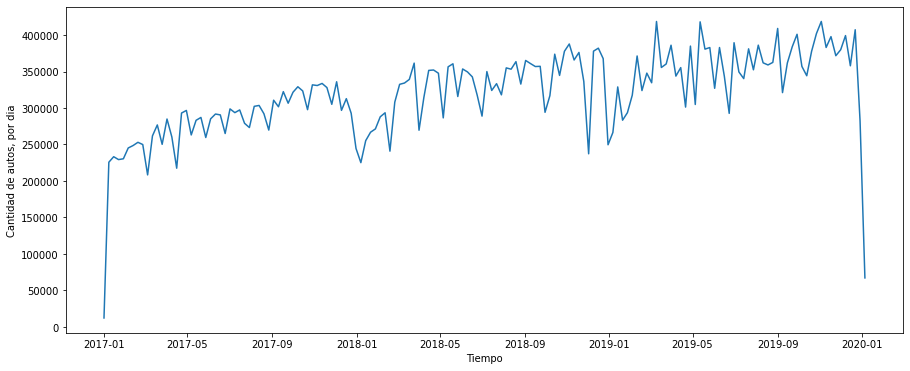

In [44]:
dataset_telepase = pd.concat([data_2019, data_2018, data_2017])

mask = np.logical_and(dataset_telepase.estacion=='Illia', dataset_telepase.forma_pago == 'TELEPASE')
dataset_telepase = dataset_telepase[mask]

dataset_telepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')

dataset_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_telepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 

dataset_telepase.sort_values('fecha', inplace = True)
dataset_telepase.reset_index(drop=True, inplace = True)

semanal_telepase = dataset_telepase.resample('W', on = 'fecha').sum()
plt.figure(figsize = (15,6))
plt.plot(semanal_telepase.index, semanal_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()



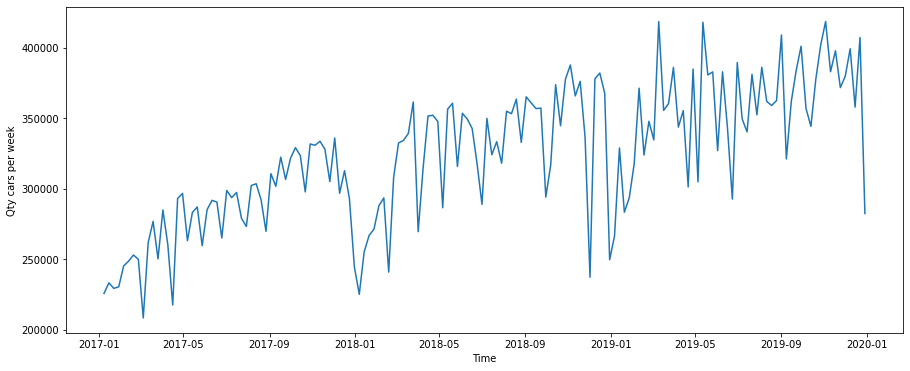

In [46]:
semanal_telepase.cantidad_pasos[semanal_telepase.cantidad_pasos<200000] = np.nan
semanal_telepase = semanal_telepase.dropna()

plt.figure(figsize = (15,6))
plt.plot(semanal_telepase.index, semanal_telepase.cantidad_pasos)
plt.xlabel('Time')
plt.ylabel('Qty cars per week')
plt.show()

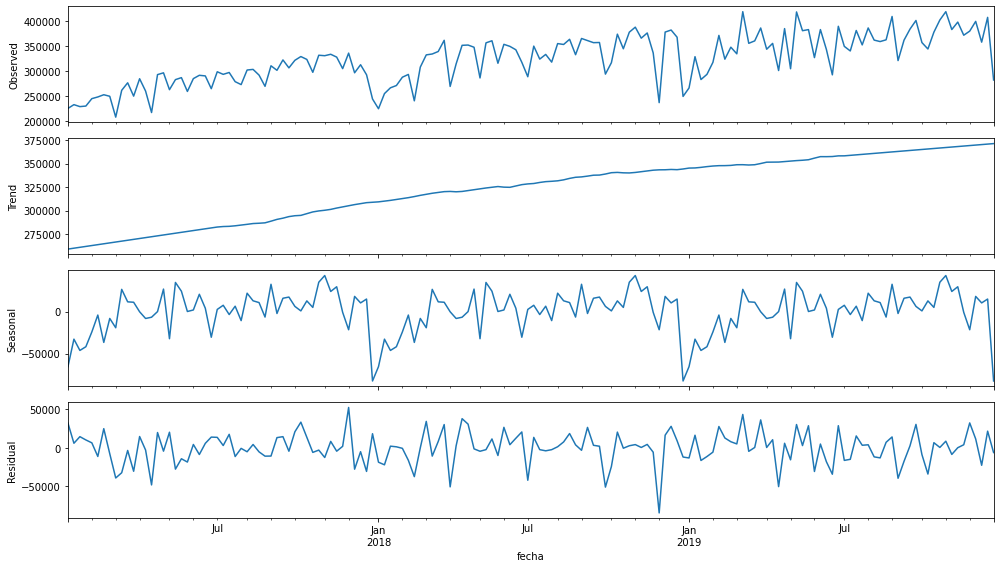

In [51]:
rcParams['figure.figsize'] = 14, 8

decomposition_telepase = sm.tsa.seasonal_decompose(semanal_telepase, model='additive', extrapolate_trend='freq')
fig = decomposition_telepase.plot()
plt.show()

As we can observe in the trend of the vehicles that pay with Telepase, we clearly notice that it is increasing over the years. In turn, the growth values are similar to the decrease values observed in the vehicular cash payment flow, which is why the hypothesis is confirmed that over the years there is a marked migration of cash users towards the Telepase payment method.

The quarter with the highest traffic flow is the last quarter of each year. There you can see peaks there, it may be because summer begins, the festivities are approaching and people begin to circulate more within the city. Then, at the beginning of each year there is a steep drop, which is due to the beginning of the high holiday season and many people decide to leave the city. Then we see that in March it picks up again.

###**Predictive Models:**

Next, we are going to leave the complete dataset with the year 2020 in a correct format, which we will then use for the final prediction.

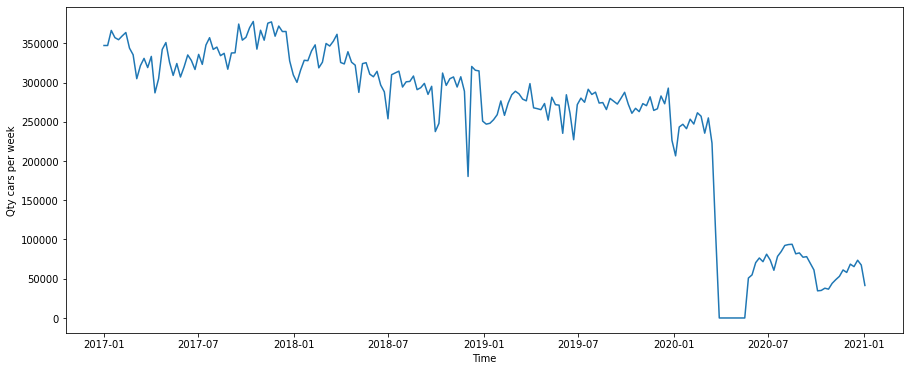

In [53]:
semanal_completo = dataset_completo.resample('W', on = 'fecha').sum()

semanal_completo.cantidad_pasos[0] = semanal_completo.cantidad_pasos[1]

plt.figure(figsize = (15,6))
plt.plot(semanal_completo.index, semanal_completo.cantidad_pasos)
plt.xlabel('Time')
plt.ylabel('Qty cars per week')
plt.show()


In the first instance, we are going to organize the data, in such a way that we have the last semester of 2019 left to test. In turn, the data from a period of one year prior to the period to be predicted will be used as training.

In [55]:
senial = semanal.cantidad_pasos

In [56]:
senial

fecha
2017-01-01    347212
2017-01-08    347212
2017-01-15    366413
2017-01-22    357215
2017-01-29    354581
               ...  
2019-12-08    282891
2019-12-15    272960
2019-12-22    292881
2019-12-29    226390
2020-01-05    226390
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: int64

In [57]:
look_back = 52 # usamos un año de datos para predecir el valor siguiente

In [58]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)


(105, 52) (105,)


In [59]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [60]:
N_test = 13 #number of points that we are going to use to evaluate
N_train = 3*52 - N_test - look_back #number of instances that we are going to use to train 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)                            

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(91, 52) (91,)
(13, 52) (13,)


**Benchmark Model:**  
The benchmark model will be used as the one that predicts a period of time by copying what was observed in the previous period.


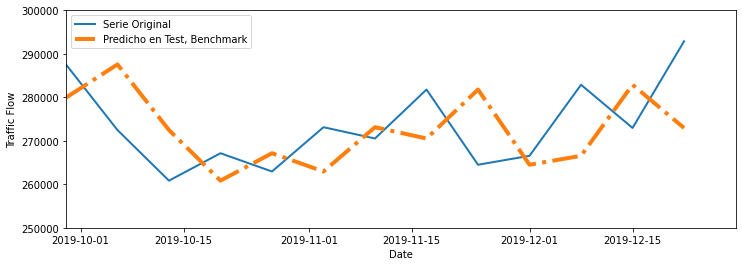

Error of the Benchmark Model:  11705


In [61]:
from sklearn.metrics import mean_squared_error
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 2, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 4, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.ylim(250000, 300000)
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()

y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print('Error of the Benchmark Model: ', np.sqrt(MSE).astype(int))

**Random Forest Regressor Model: 1° One-Step Prediction**

In a first approach to the prediction models, a random forest regressor will be used, manually testing some of its hyperparameters and studying the errors of the model taking as a reference the benchmark model exposed in the previous point.

In [62]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs = -1).fit(X_train,y_train)
y_pred_RF = RF.predict(X)
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_test)

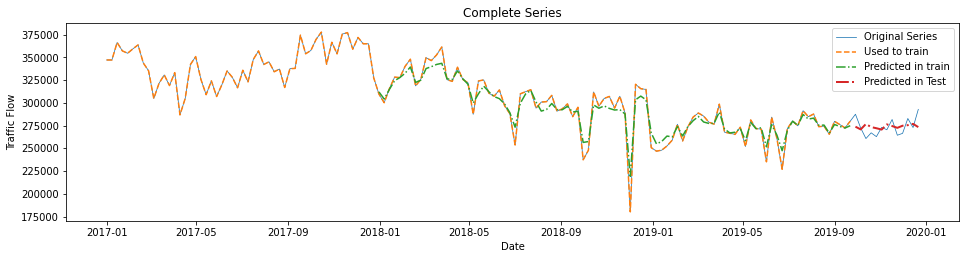

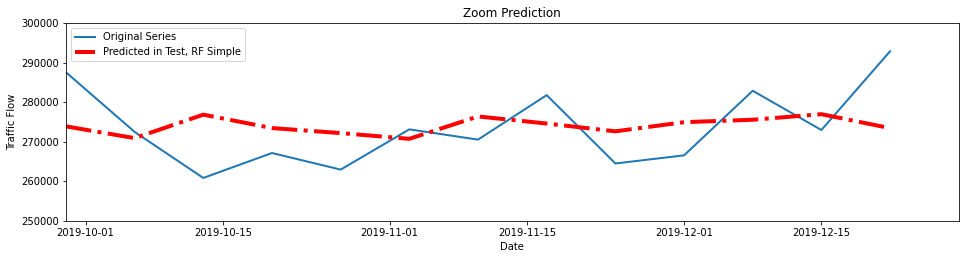

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Original Series')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Used to train')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_RF,'-.',label = 'Predicted in train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_RF,'-.', lw = 2, label = 'Predicted in Test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.title('Complete Series')
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2, 1, 2)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 2, label = 'Original Series')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_RF,'-.', lw = 4, label = 'Predicted in Test, RF Simple', color='r')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.ylim(250000, 300000)
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.legend()
plt.title('Zoom Prediction')
plt.show()

In [65]:
MSE = mean_squared_error(y_train, y_train_pred_RF)
print('Error in Train:',np.sqrt(MSE).astype(int))

MSE = mean_squared_error(y_test, y_test_pred_RF)
print('Error in Test Random Forest Simple:',np.sqrt(MSE).astype(int))

Error in Train: 8756
Error in Test Random Forest Simple: 9794


As we can see, this model had a better performance than the reference model, but we can notice that there is a considerable difference between the error of the test and the train, which we will try to correct in the next step. Now, we will try to manually optimize some of its hyperparameters in order to improve the performance of the model.

**Random Forest Regressor: 2° One-Step Prediction**

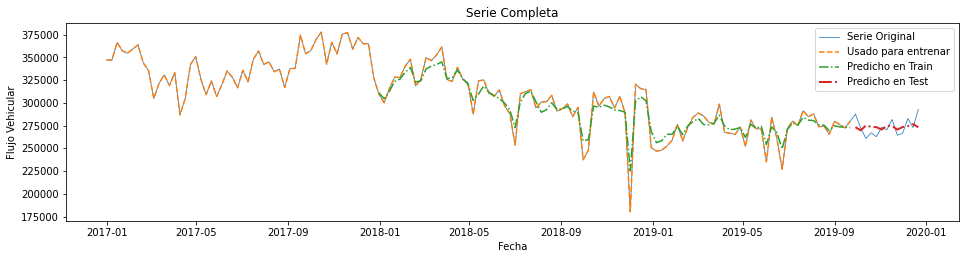

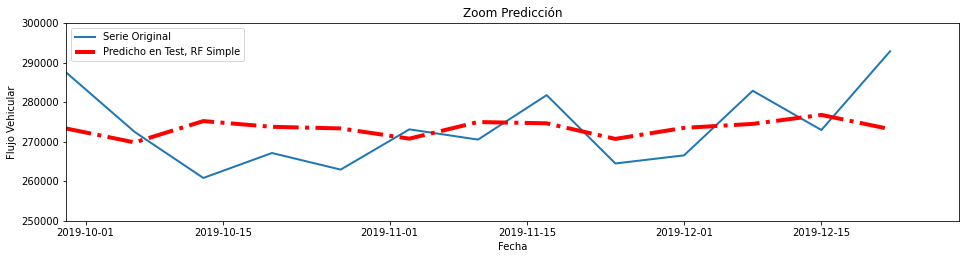

Error en Train: 9765
Error en Test Random Forest Simple: 9622


In [ ]:
RF2 = RandomForestRegressor(n_estimators=250, max_depth=5, min_samples_split=3, random_state=42, n_jobs = -1).fit(X_train,y_train)
y_pred_RF = RF2.predict(X)
y_train_pred_RF2 = RF2.predict(X_train)
y_test_pred_RF2 = RF2.predict(X_test)

plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Original Series')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Used to Train')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_RF2,'-.',label = 'Predicted in Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_RF2,'-.', lw = 2, label = 'Predicted in Test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.title('Complete Series')
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2, 1, 2)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 2, label = 'Original Series')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_RF2,'-.', lw = 4, label = 'Predicted in Test, RF Simple', color='r')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.ylim(250000, 300000)
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.legend()
plt.title('Zoom Prediction')
plt.show()

MSE2 = mean_squared_error(y_train, y_train_pred_RF2)
print('Error in Train:',np.sqrt(MSE2).astype(int))

MSE2 = mean_squared_error(y_test, y_test_pred_RF2)
print('Error in Test Random Forest Simple:',np.sqrt(MSE2).astype(int))

As we can see in this second model, the error measured in the test decreased slightly, in turn, the difference between the error measured in the test and that measured in the train was reduced, which implies that it was possible to considerably reduce the variance within of the model.
Next, we will seek to optimize the hyperparameters of the model through a GridSearch and thus be able to compare the results with the models already obtained and go for the best predictive model.

**GridSearch:**


In [ ]:
from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics

param_grid_rf = {'n_estimators' : [150, 250, 350],
              'criterion': ['mse'], 
              'max_depth': [4, 5, 6, 8, 10],
              'min_samples_split':np.arange(2, 4),
              'random_state': [42]  }

random_forest = RandomForestRegressor()

grid_search = GridSearchCV(random_forest, param_grid=param_grid_rf, cv=5, n_jobs = -1,  return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_split': 3,
 'n_estimators': 250,
 'random_state': 42}

In [ ]:
best_RF = grid_search.best_estimator_ 
y_train_pred_bestRF = best_RF.predict(X_train)
y_test_pred_bestRF = best_RF.predict(X_test)

rmse_train_best_RF = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_bestRF))
rmse_test_best_RF = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_bestRF))


print("Root mean square error in train is:", (rmse_train_best_RF.astype(int)))
print("Root mean square error in train is test is:", (rmse_test_best_RF.astype(int)))

Raíz del error cuadrático medio en train es: 9765
Raíz del error cuadrático medio en test es: 9622


How we can observe the optimization of the GridSearch under the range of hyperparameters indicated indicates the same model that we had generated in the 2nd Random Forest Regressor One Steap Prediction model. Next, using the already trained RF2 model, we are going to make a Random Forest Regressor model but this time using a recursive Multi-Step Prediction method.

**Random Forest Regressor: Multi-Step Prediction**  

With the model already trained, we are going to use the recursive method to do Multi-Step prediction.

In [ ]:
y_ms_test_pred = []
x = X_test[0,:] #we start with the first instances of the test set
for i in range(y_test.size):
    y_os_pred = RF2.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [ ]:
y_test

array([287568., 272483., 260840., 267147., 262950., 273129., 270536.,
       281790., 264500., 266555., 282891., 272960., 292881.])

In [ ]:
x.reshape(1,-1)


array([[250861.        , 246994.        , 248077.        ,
        252617.        , 259019.        , 276568.        ,
        258204.        , 273664.        , 284439.        ,
        288919.        , 285547.        , 278834.        ,
        276714.        , 298638.        , 267797.        ,
        266745.        , 265423.        , 273282.        ,
        252104.        , 281283.        , 271796.        ,
        271232.        , 235301.        , 284432.        ,
        260940.        , 227123.        , 271865.        ,
        280160.        , 274852.        , 291431.        ,
        284822.        , 287773.        , 273867.        ,
        274513.        , 265594.        , 279775.        ,
        276271.        , 272592.        , 279927.        ,
        273354.60008478, 269357.33144004, 275133.27822677,
        274467.66186312, 273093.86105837, 271950.15669105,
        275497.95071302, 274619.33914419, 270676.28663672,
        274205.30409862, 274716.04978287, 275270.6839399

In [ ]:
y_ms_test_pred.astype(int)

array([[273354],
       [269357],
       [275133],
       [274467],
       [273093],
       [271950],
       [275497],
       [274619],
       [270676],
       [274205],
       [274716],
       [275270],
       [274500]])

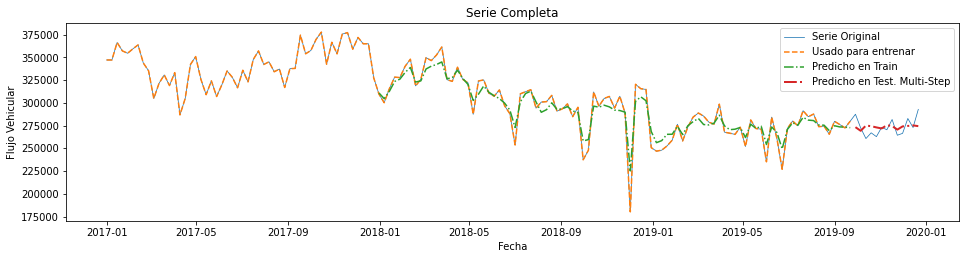

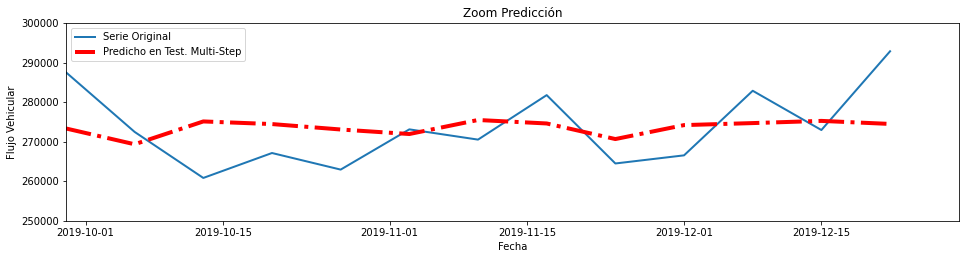

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Original Series')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Used to train')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_RF2,'-.',label = 'Predicted in Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 2, label = 'Predicted in Test. Multi-Step')
plt.legend()
plt.title('Complete Series')
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2, 1, 2)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 2, label = 'Original Series')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicted in Test. Multi-Step', color='r')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.ylim(250000, 300000)
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.legend()
plt.title('Zoom Prediction')
plt.show()

In [ ]:
MSE_MS = mean_squared_error(y_train, y_train_pred_RF2)
print('Error in Train:',np.sqrt(MSE_MS).astype(int))

MSE_MS = mean_squared_error(y_test, y_ms_test_pred)
print('Error in Test Multi Step:',np.sqrt(MSE_MS).astype(int))

Error en Train: 9765
Error en Test Multi Step: 9432


How can we observe under this method we can reduce the Error in the Test, maintaining the error observed in the Tain since we use the model already trained from the previous step, that is why, within the models generated with the Random Forest Regressor technique we go to choose the Multi-Step Predictor.

**Error distribution within the selected model:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


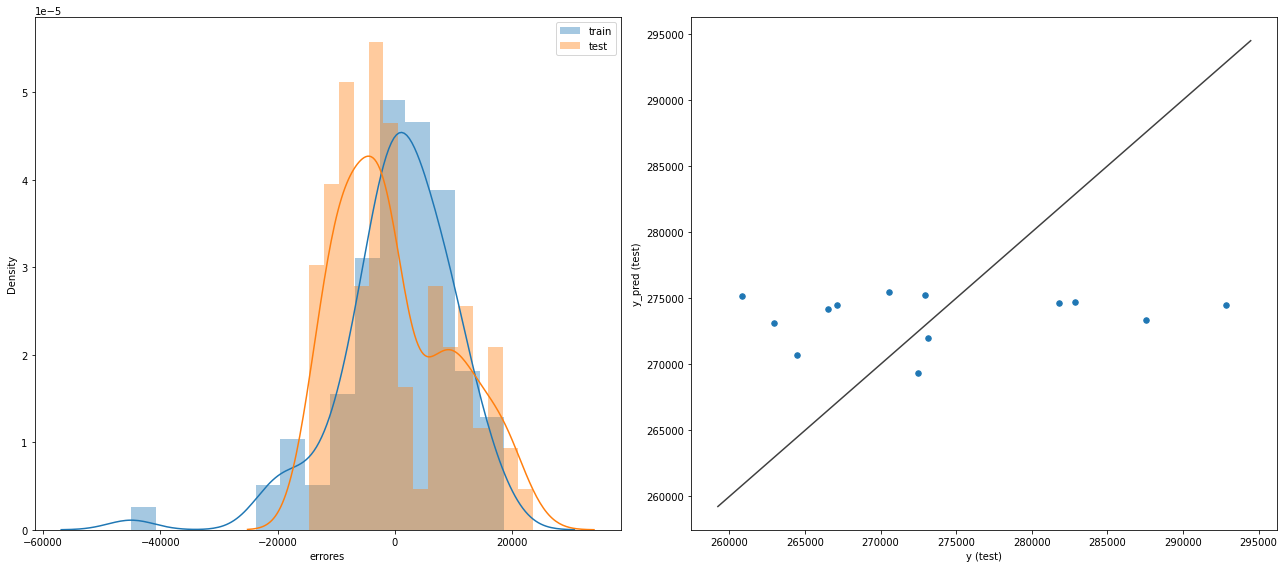

In [ ]:
import seaborn as sns

plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_RF2, bins = 15, label = 'train')
sns.distplot(y_test - y_ms_test_pred, bins = 15, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_ms_test_pred, s =30)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

As we can see, the model presents a big error, especially when it is being estimated later in time. This may be because only one previous year of data was used to predict.

**Forecast 2020:**  
After having analyzed and compared all the prediction models, the Random Forest Regressor Multi-Step Prediction was chosen as the best performance model to predict the behavior of the traffic flow for the year 2020. Next, we made the prediction and evaluated the error Of the same.




In [ ]:
senial_prediccion_completa = semanal_completo.cantidad_pasos
look_back_nuevo = 104

N_nuevo = senial_prediccion_completa.shape[0]
X_nuevo = np.zeros((N_nuevo - look_back_nuevo - 1,look_back_nuevo))
y_nuevo = np.zeros(N_nuevo - look_back_nuevo - 1)

for i in range(X_nuevo.shape[0]):
    X_nuevo[i,:] = senial_prediccion_completa.iloc[i:i+look_back_nuevo]
    y_nuevo[i] = senial_prediccion_completa.iloc[i+look_back_nuevo]

N_test_nuevo = 52 #number of points that we are going to use to evaluate
N_train_nuevo = 4*52 - N_test_nuevo - look_back_nuevo #number of instances that we are going to use to train.
N_total_nuevo = N_train_nuevo + N_test_nuevo

length_total_nuevo = N_train_nuevo + N_test_nuevo + look_back_nuevo

X_train_nuevo = X[:N_train_nuevo,:]
y_train_nuevo = y[:N_train_nuevo]
print(X_train_nuevo.shape, y_train_nuevo.shape)                            

X_test_nuevo = X[N_train_nuevo:N_train_nuevo+N_test_nuevo,:]
y_test_nuevo = y[N_train_nuevo:N_train_nuevo+N_test_nuevo]
print(X_test_nuevo.shape, y_test_nuevo.shape)

(52, 52) (52,)
(52, 52) (52,)


**Grid Search:**  
Next, we will look again for the best parameters to use the model with the new X test, X train, Y test and Y train.

In [ ]:
from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics

param_grid_rf = {'n_estimators' : [150, 250, 350],
              'criterion': ['mse'], 
              'max_depth': [4, 5, 6, 8, 10],
              'min_samples_split':np.arange(2, 4),
              'random_state':[42] }

random_forest = RandomForestRegressor()

grid_search = GridSearchCV(random_forest, param_grid=param_grid_rf, cv=5, n_jobs = -1,  return_train_score = True)
grid_search.fit(X_train_nuevo, y_train_nuevo)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'min_samples_split': 3,
 'n_estimators': 150,
 'random_state': 42}

In [ ]:
best_RF2 = grid_search.best_estimator_ 
y_train_pred_bestRF2 = best_RF2.predict(X_train_nuevo)
y_test_pred_bestRF2 = best_RF2.predict(X_test_nuevo)

rmse_train_best_RF2 = np.sqrt(metrics.mean_squared_error(y_train_nuevo, y_train_pred_bestRF2))
rmse_test_best_RF2 = np.sqrt(metrics.mean_squared_error(y_test_nuevo, y_test_pred_bestRF2))


print("Root mean square error in train is:", (rmse_train_best_RF2.astype(int)))
print("Root mean square error in test is:", (rmse_test_best_RF2.astype(int)))

Raíz del error cuadrático medio en train es: 10984
Raíz del error cuadrático medio en test es: 24838


In [ ]:
y2_ms_test_pred = []
x = X_test_nuevo[0,:] #we start with the first instances of the test set
for i in range(52):
    y2_os_pred = best_RF2.predict(x.reshape(1,-1))
    y2_ms_test_pred.append(y2_os_pred)
    x = np.append(x[1:], y2_os_pred)
y2_ms_test_pred = np.array(y2_ms_test_pred)

In [ ]:
x.reshape(1,-1)

array([[301184.23332357, 281659.22101587, 292933.55844444,
        303384.65822222, 287333.61934921, 290650.40980952,
        301283.87925397, 280055.82215873, 297407.96777778,
        250239.768     , 253534.32168254, 301138.74966667,
        297903.335     , 300949.19866667, 303588.30944444,
        285676.25888889, 303622.49666667, 285268.60522222,
        246692.90122222, 284116.63444444, 301312.16444444,
        287854.99355556, 296805.20844444, 255008.42933333,
        283098.07422222, 298199.95188889, 272050.67111111,
        291879.84988889, 303261.70222222, 261548.43344444,
        301034.06133333, 246554.33322222, 247635.604     ,
        286591.50555556, 296621.28288889, 287685.13477778,
        299564.27011111, 260112.87033333, 285135.53422222,
        271145.30588889, 243315.89177778, 259481.27955556,
        296377.57655556, 275546.89733333, 295950.17066667,
        244533.04433333, 257943.08211111, 278465.886     ,
        267706.61888889, 268551.67855556, 293287.8478888

In [ ]:
y2_ms_test_pred.astype(int)

array([[301184],
       [281659],
       [292933],
       [303384],
       [287333],
       [290650],
       [301283],
       [280055],
       [297407],
       [250239],
       [253534],
       [301138],
       [297903],
       [300949],
       [303588],
       [285676],
       [303622],
       [285268],
       [246692],
       [284116],
       [301312],
       [287854],
       [296805],
       [255008],
       [283098],
       [298199],
       [272050],
       [291879],
       [303261],
       [261548],
       [301034],
       [246554],
       [247635],
       [286591],
       [296621],
       [287685],
       [299564],
       [260112],
       [285135],
       [271145],
       [243315],
       [259481],
       [296377],
       [275546],
       [295950],
       [244533],
       [257943],
       [278465],
       [267706],
       [268551],
       [293287],
       [249034]])

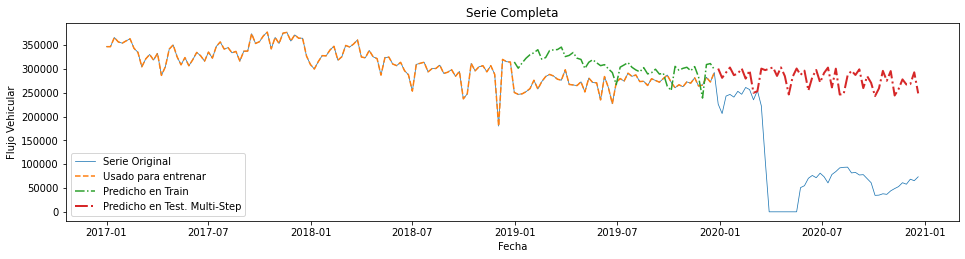

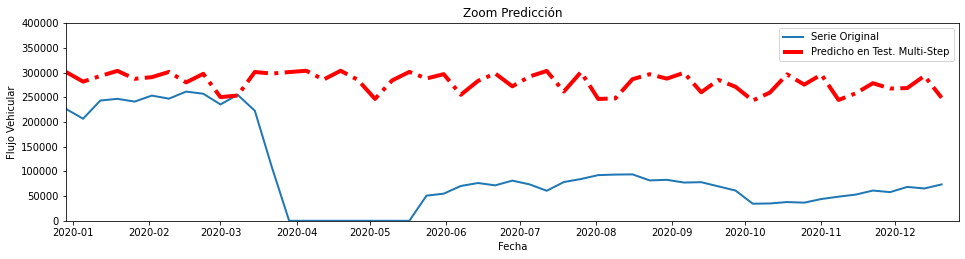

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.plot(senial_prediccion_completa.index[:length_total_nuevo], senial_prediccion_completa[:length_total_nuevo],lw = 0.75, label = 'Original Series')
plt.plot(senial_prediccion_completa.index[:N_train_nuevo + look_back_nuevo], senial_prediccion_completa[:N_train_nuevo + look_back_nuevo],'--', label = 'Used for train')
plt.plot(senial_prediccion_completa.index[look_back_nuevo: look_back_nuevo + N_train_nuevo], y_train_pred_bestRF2,'-.',label = 'Predicted in Train')
plt.plot(senial_prediccion_completa.index[N_train_nuevo+look_back_nuevo: length_total_nuevo], y2_ms_test_pred,'-.', lw = 2, label = 'Predicted in Test. Multi-Step')
plt.legend()
plt.title('Complete Series')
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2, 1, 2)
plt.plot(senial_prediccion_completa.index[:length_total_nuevo], senial_prediccion_completa[:length_total_nuevo],lw = 2, label = 'Original Series')
plt.plot(senial_prediccion_completa.index[N_train_nuevo+look_back_nuevo: length_total_nuevo], y2_ms_test_pred,'-.', lw = 4, label = 'Predicted in Test. Multi-Step', color='r')
plt.xlim(senial_prediccion_completa.index[N_train_nuevo+look_back_nuevo], senial_prediccion_completa.index[length_total_nuevo])
plt.ylim(0, 400000)
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.legend()
plt.title('Zoom Prediction')
plt.show()

In [ ]:
MSE_MS = mean_squared_error(y_train_nuevo, y_train_pred_bestRF2)
print('Error in Train:',np.sqrt(MSE_MS).astype(int))

MSE_MS = mean_squared_error(y_test_nuevo, y2_ms_test_pred)
print('Error in Test Multi Step:',np.sqrt(MSE_MS).astype(int))

Error en Train: 10984
Error en Test Multi Step: 28589


As we can see, the error in the train is similar to the previous ones, but the error with the test is very high. This is because during 2020 the Covid pandemic began in Argentina. This caused the government to enact a very strict quarantine which caused the circulation of cars in the City of Buenos Aires to drastically decrease. Therefore, when our model predicts based on previous years, it does not take this scenario into account.

**Predict Error Distribution in forecast 2020:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


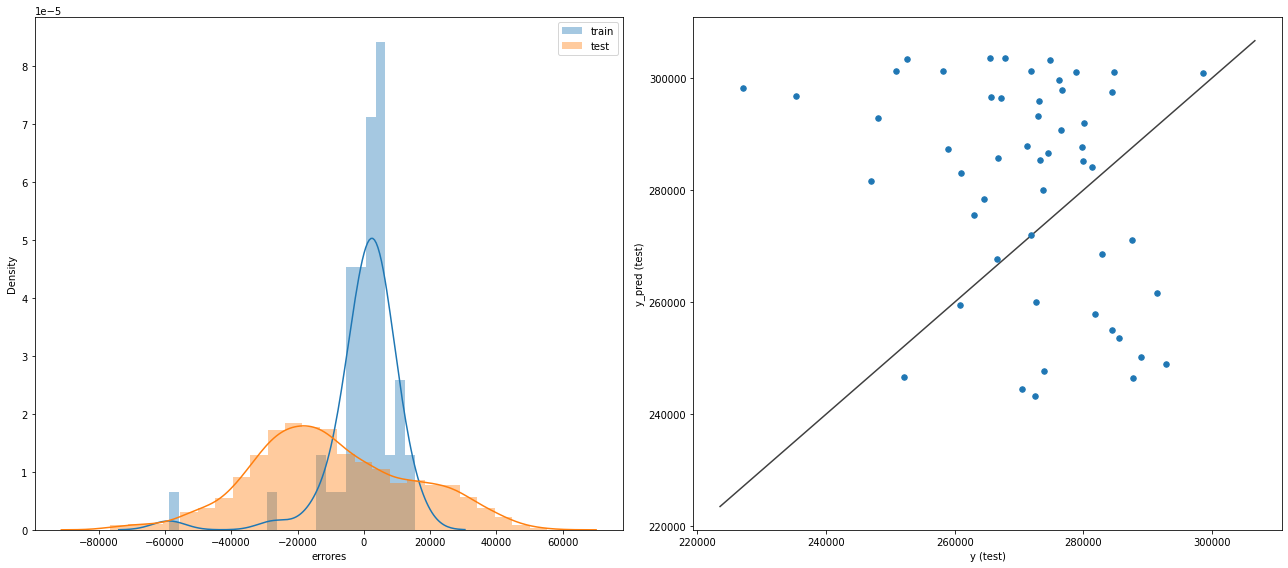

In [ ]:
from sklearn.metrics import mean_squared_error

plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.distplot(y_train_nuevo - y_train_pred_bestRF2, bins = 25, label = 'train')
sns.distplot(y_test_nuevo - y2_ms_test_pred, bins = 25, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_nuevo,y2_ms_test_pred, s =30)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Looking at these graphs, you see a large spread of the error. This is due to what has been said above, while predicting, our model is not taking into account that during 2020 the Covid began and a strict quarantine was decreed, which caused a drastical decrease in the circulation of vehicles in the city of Buenos Aires. Aires (it is an outlier for the model).

Adding 2020 to the model only adds noise and should not be taken into account, since it is a very particular year due to the pandemic. It would be necessary to study how the circulation of vehicles evolves once the pandemic is over.

**XGBOOST Model:**

At this point, a prediction model will be made using an XGBoost Regressor, in order to compare its performance with the prediction models generated previously:

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# XGBRegressor_simple = XGBRegressor(silent=1)

XGBRegressor_simple = XGBRegressor(
        learning_rate = 0.05,
        max_depth = 5,
        min_child_weight = 1,
        subsample = 0.3,
        colsample_bytree = 0.3,
        n_estimators = 250,
        objective = 'reg:squarederror',
        silent=1)

XGBRegressor_simple_scores = cross_validate(XGBRegressor_simple, X_train, y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)

print("Root mean square error in train is:", np.sqrt((-1)*XGBRegressor_simple_scores['train_score'].mean()).astype(int))
print("Root mean square error in test is:", np.sqrt((-1)*XGBRegressor_simple_scores['test_score'].mean()).astype(int))

Raíz del error cuadrático medio en train es: 3684
Raíz del error cuadrático medio en test es: 32411


How we can see the model presents a very low level of error in the train and a very high level of error in the test, which implies that there is clearly a strong bias in it and probably the model presents an OverFitting problem, where he learned the train values almost by heart but was unable to find a correct predictor function of the trends of the series to predict his behaviors in the future.

**ARIMA Model:**

At this point, a prediction model will be made using an ARIMA model, in order to compare its performance with the prediction models generated previously:

In [ ]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

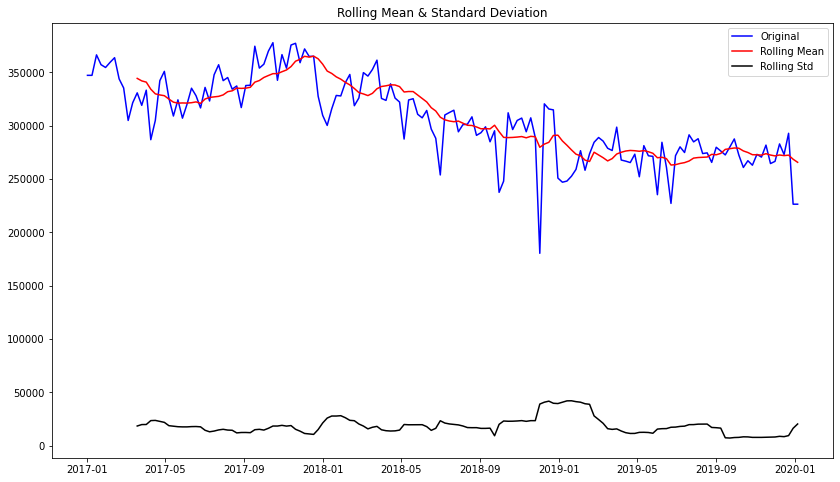

In [ ]:
test_stationarity(semanal)

In [ ]:
result = adfuller(semanal.cantidad_pasos)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.142539
p-value: 0.697813


How can we observe in the graph, in the case of the mean or std deviation, neither is constant, which implies that the series is not stationary. We can also conlcute this hypothesis since the value of p = 0.69 is greater than 0.05, which prevents us from rejecting the null hypothesis of the test, implying that the series is not stationary.

In [ ]:
import itertools
import statsmodels.api as sm


In [ ]:
train_arima=semanal.iloc[:-13]
test_arima=semanal.iloc[-13:-1]
print(train_arima.shape,test_arima.shape)

(145, 1) (12, 1)


In [ ]:
train_arima

,cantidad_pasos
fecha,
2017-01-01,347212
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
...,...
2019-09-08,276271
2019-09-15,272592
2019-09-22,279927


In [ ]:
test_arima

,cantidad_pasos
fecha,
2019-10-13,260840
2019-10-20,267147
2019-10-27,262950
2019-11-03,273129
2019-11-10,270536
2019-11-17,281790
2019-11-24,264500
2019-12-01,266555
2019-12-08,282891


In [ ]:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)52 - AIC:4053.6887358490253
ARIMA(0, 0, 0)x(0, 0, 1, 12)52 - AIC:3623.637584882049
ARIMA(0, 0, 0)x(0, 1, 0, 12)52 - AIC:3135.731907395237
ARIMA(0, 0, 0)x(0, 1, 1, 12)52 - AIC:2844.5675879557316
ARIMA(0, 0, 0)x(1, 0, 0, 12)52 - AIC:3153.649838967968
ARIMA(0, 0, 0)x(1, 0, 1, 12)52 - AIC:3126.420530704044
ARIMA(0, 0, 0)x(1, 1, 0, 12)52 - AIC:2855.7075898578382


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)52 - AIC:2835.113317920651
ARIMA(0, 0, 1)x(0, 0, 0, 12)52 - AIC:3926.354212590736
ARIMA(0, 0, 1)x(0, 0, 1, 12)52 - AIC:3574.7782523682727
ARIMA(0, 0, 1)x(0, 1, 0, 12)52 - AIC:3096.3903924864344
ARIMA(0, 0, 1)x(0, 1, 1, 12)52 - AIC:2800.524801030158
ARIMA(0, 0, 1)x(1, 0, 0, 12)52 - AIC:3615.5479814661285
ARIMA(0, 0, 1)x(1, 0, 1, 12)52 - AIC:3563.09988128191
ARIMA(0, 0, 1)x(1, 1, 0, 12)52 - AIC:2832.3413163770065
ARIMA(0, 0, 1)x(1, 1, 1, 12)52 - AIC:2785.650625418478
ARIMA(0, 1, 0)x(0, 0, 0, 12)52 - AIC:3300.5935571941973
ARIMA(0, 1, 0)x(0, 0, 1, 12)52 - AIC:3032.903788882214
ARIMA(0, 1, 0)x(0, 1, 0, 12)52 - AIC:3134.724142115811
ARIMA(0, 1, 0)x(0, 1, 1, 12)52 - AIC:2804.649306191187
ARIMA(0, 1, 0)x(1, 0, 0, 12)52 - AIC:3054.744622807446
ARIMA(0, 1, 0)x(1, 0, 1, 12)52 - AIC:3034.577851759952
ARIMA(0, 1, 0)x(1, 1, 0, 12)52 - AIC:2823.741036075725
ARIMA(0, 1, 0)x(1, 1, 1, 12)52 - AIC:2794.1384939395844
ARIMA(0, 1, 1)x(0, 0, 0, 12)52 - AIC:3242.4367787403526
ARIM

In [ ]:
results.aic.min()

2758.8916214414853

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train_arima,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.171      1.301      0.193      -0.113       0.559
ma.L1         -0.7042      0.153     -4.600      0.000      -1.004      -0.404
ar.S.L12      -0.3408      0.163     -2.089      0.037      -0.660      -0.021
ma.S.L12      -0.3369      0.134     -2.509      0.012      -0.600      -0.074
sigma2      1.105e+09   3.88e-11   2.85e+19      0.000     1.1e+09     1.1e+09


In [ ]:
pred = results.get_prediction(starts='2019-10-13', dynamic=False)
y_forecasted = pred.predicted_mean
y_forecasted = y_forecasted.loc[y_forecasted.index[133: ]]
y_forecasted = pd.DataFrame(y_forecasted.values.astype(int), index=test_arima.index)
y_forecasted.columns=['cantidad_pasos_estimado']
y_truth = test_arima
#Mean Square Error
mse_arima = mean_squared_error(test_arima, y_forecasted)
print('The root mean square error is:',np.sqrt(mse_arima).astype(int))

La raíz del error cuadrático medio es: 21053


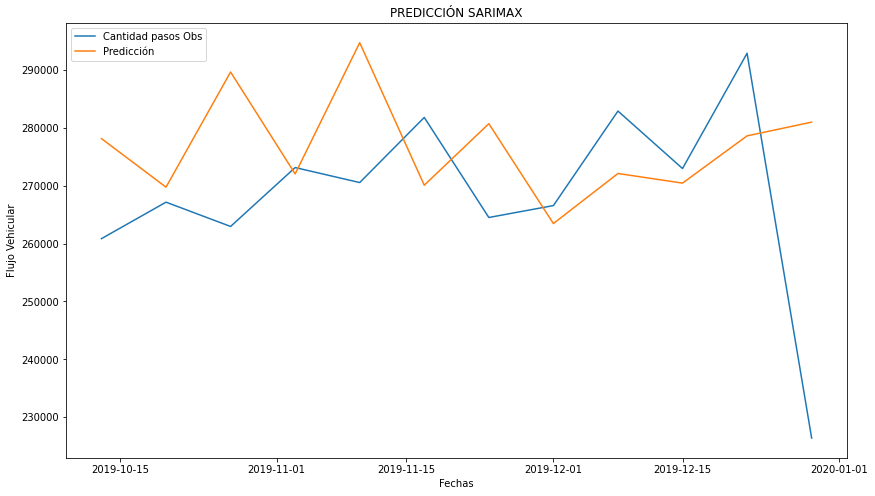

In [ ]:
plt.plot(test_arima['cantidad_pasos'], label='Qty of cars obs')
plt.plot(y_forecasted['cantidad_pasos_estimado'], label='Prediction')
plt.legend()
plt.title('SARIMAX Forecast')
plt.xlabel('Dates')
plt.ylabel('Traffic Flow')
plt.show()

How we can observe the model presents a Root of the Mean Squared Error of the order of 21000, which implies much greater error than the one analyzed in the Random Forest Regressors prediction models.

**PROPHET Model:**

At this point, a prediction model will be made using a PROPHET model, in order to compare its performance with the prediction models generated previously:

In [ ]:
senial_nueva = pd.DataFrame(semanal)
senial_nueva['index'] = senial_nueva.index
senial_nueva.columns = ['cantidad_pasos', 'fecha']


In [ ]:
senial_nueva = senial_nueva[['fecha', 'cantidad_pasos']]
senial_nueva

,fecha,cantidad_pasos
fecha,,
2017-01-01,2017-01-01,347212
2017-01-08,2017-01-08,347212
2017-01-15,2017-01-15,366413
2017-01-22,2017-01-22,357215
2017-01-29,2017-01-29,354581
...,...,...
2019-12-08,2019-12-08,282891
2019-12-15,2019-12-15,272960
2019-12-22,2019-12-22,292881


In [ ]:
train_prophet = senial_nueva['2017-01-01' : '2019-10-06']
test_prophet = senial_nueva['2019-10-13	': '2019-12-29']


In [ ]:
train_prophet

,fecha,cantidad_pasos
fecha,,
2017-01-01,2017-01-01,347212
2017-01-08,2017-01-08,347212
2017-01-15,2017-01-15,366413
2017-01-22,2017-01-22,357215
2017-01-29,2017-01-29,354581
...,...,...
2019-09-08,2019-09-08,276271
2019-09-15,2019-09-15,272592
2019-09-22,2019-09-22,279927


In [ ]:
train_prophet.columns = ['ds', 'y']
test_prophet.columns = ['ds', 'y']

In [ ]:
from fbprophet import Prophet
model_p = Prophet()
model_p.fit(train_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


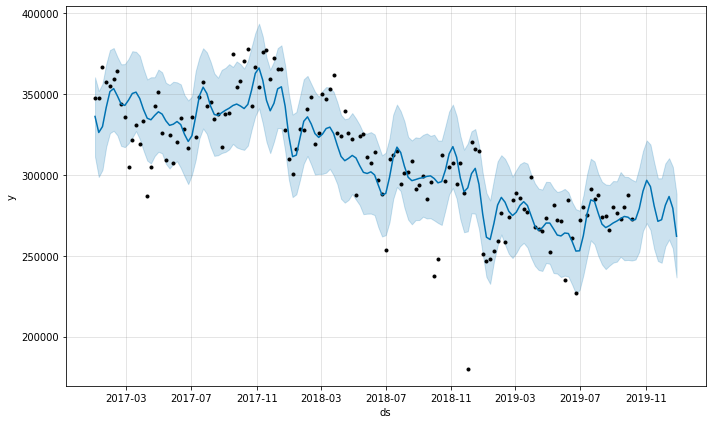

In [ ]:
future = model_p.make_future_dataframe(periods=12, freq='W')
fcst = model_p.predict(future)
fig = model_p.plot(fcst)

In [ ]:
y_true_p = test_prophet['y']
y_pred_p = fcst.loc[fcst.index[145: ]] ['yhat']

mse_p = mean_squared_error(y_true_p, y_pred_p)
print('La raíz del error cuadrático medio es:',np.sqrt(mse_p).astype(int))

La raíz del error cuadrático medio es: 17693


How we can observe the model presents a Root of the Mean Squared Error of the order of 17000, which implies much greater error than the one analyzed in the Random Forest Regressors prediction models.

###**Conclusiones:**

**Model Selection:**  
The indicators obtained in each model will then be shown in a table, in order to make a simultaneous comparison and explain why the model used in the prediction was chosen.

The following table will show the scores of each of the models in order to justify the selection of the chosen model (they are the models that we use to predict the last quarter of 2019 with the 2017, 2018 and 2019 dataset):

| Modelo                   | RMSE train   | RMSE test    | Selección   |
| :----------------:       | :---------:  | :---------:  | :---------: |
| Benchmark                |              |   11.705      |             |
| One-Step prediction 1    |   8.756       |   9.794       |             |    
| One-Step prediction 2    |   9.765       |   9.622       |             |
| Random Forest Regressor:  Multi step prediction |   9.765   |   9.432   |<img src=https://i.ibb.co/d60z9fF/Sin-t-tulo.png> |                
| XGBOOST                  |   3.684       |   32.411      |             |
| ARIMA /SARIMAX           |              |   21.053      |             |
| Prophet                  |              |   17.693      |             |

At the beginning we started by comparing the models based on Random Forest Regression One-Step Prediction, what we can see at a glance is that both have a better performance than the reference model, in turn, the 1st model has a lot of variance between the Train and the Test, aspect that improves when we optimize the hyperparameters in the 2nd model, that is why the latter is preferable over the first. Then, in the Multi-Step Prediction we managed to improve its performance in terms of the test and reduce its error, as a result of the trained model, which is why the latter is the model selected within the Random Forest Regressors.
On the other hand, when we observe the model based on XGBOOST, we see that its error in the train is very low and its error in the test is too high, which indicates that the model is overfitting and has a high bias in its learning. In the case of the Arima and Prophet models, we can observe that their error is considerably higher than in the RFR-based models and that is why they were discarded.

The selected model is the Random Forest Fegressor Multi-Step Prediciton


**How is the error distribution? Where does it fail? For what is this?**

As we can see if we look at the error graphs of the selected model:  
The RMSE errors are similar for both test and train, indicating that there is not a large overfitting. The histograms of the errors are not very symmetric. One is Gaussian but the other takes a different form. This may indicate that we are not approaching the data in the most correct way. The model fails to a greater extent when it tries to predict traffic later in time, this may be due to the fact that the model only looked one year back to predict one year ahead, if the model had more information, the prediction could have improved.

**Conclusions:**  

I really liked the project itself, discovering how to analyze data that have the temporal variable is very interesting and applicable to many problems that I face daily, in turn, it was complemented with the knowledge acquired in previous projects and showing the importance of a good exploratory analysis in order to understand the data and the information that they are showing us.

Regarding the predictions and the models used, it seemed very important to know new models more focused on the problem in question, such as ARIMA and PROPHET. It should also be noted that the selected model shows a large error in its predictions, which may be due in part to how it was devised and developed, data from one year were used to predict the future, when surely if we added more years the model would have improved and learned trends better.

It seems important to me to highlight that the 2020 prediction was very difficult to predict in advance since it was an atypical year and did not respond to the trend of previous years since the circulation in the Autonomous City of BsAs was greatly affected by the pandemic caused by Covid-19.

Finally, I want to emphasize that I would like to be able to develop a prediction model based on neural networks and thus test whether with encodeing and incorporating categorical and numerical variables, the model can predict with greater precision and understand the trends of this series in greater detail.